In [2]:
import pandas as pd
import pyarrow.parquet as pq
# pip install neuralprophet
df = pd.read_parquet("../Insumos/df_general.parquet")


# ============================================================
# CALENDARIOS OFICIALES COMPLETOS (nov 2023 - ene 2026)
# ============================================================

# Calendarios con fechas EXACTAS verificadas en fuentes oficiales
calendarios_exactos = {
    # Nov-Dic 2023: 6-30 noviembre
    '2023-11': [
        ('2023-11-06', ['A']),
        ('2023-11-07', ['B']),
        ('2023-11-08', ['C']),
        ('2023-11-09', ['C']),
        ('2023-11-10', ['D','E','F']),
        ('2023-11-13', ['G']),
        ('2023-11-14', ['G']),
        ('2023-11-15', ['H','I','J','K']),
        ('2023-11-16', ['L']),
        ('2023-11-17', ['M']),
        ('2023-11-21', ['M']),
        ('2023-11-22', ['N','Ñ','O']),
        ('2023-11-23', ['P','Q']),
        ('2023-11-24', ['R']),
        ('2023-11-27', ['R']),
        ('2023-11-28', ['S']),
        ('2023-11-29', ['T','U']),
        ('2023-11-30', ['V','W','X','Y','Z']),
    ],

    # Ene-Feb 2024 ELECTORAL: 29 enero - 23 febrero (pago doble mar-abr + may-jun)
    '2024-01-electoral': [
        ('2024-01-29', ['A']),
        ('2024-01-30', ['B']),
        ('2024-01-31', ['C']),
        ('2024-02-01', ['C']),
        ('2024-02-02', ['D','E','F']),
        ('2024-02-06', ['G']),
        ('2024-02-07', ['G']),
        ('2024-02-08', ['H']),
        ('2024-02-09', ['I','J','K']),
        ('2024-02-12', ['L']),
        ('2024-02-13', ['M']),
        ('2024-02-14', ['M']),
        ('2024-02-15', ['N','Ñ','O']),
        ('2024-02-16', ['P','Q']),
        ('2024-02-19', ['R']),
        ('2024-02-20', ['R']),
        ('2024-02-21', ['S']),
        ('2024-02-22', ['T','U']),
        ('2024-02-23', ['V','W','X','Y','Z']),
    ],

    # Jul-Ago 2024: 1-22 julio
    '2024-07': [
        ('2024-07-01', ['A']),
        ('2024-07-02', ['B']),
        ('2024-07-03', ['C']),
        ('2024-07-04', ['C']),
        ('2024-07-05', ['D','E','F']),
        ('2024-07-08', ['G']),
        ('2024-07-09', ['G']),
        ('2024-07-10', ['H','I','J','K']),
        ('2024-07-11', ['L']),
        ('2024-07-12', ['M']),
        ('2024-07-15', ['M']),
        ('2024-07-16', ['N','Ñ','O']),
        ('2024-07-17', ['P','Q']),
        ('2024-07-18', ['R']),
        ('2024-07-19', ['R']),
        ('2024-07-22', ['S','T','U','V','W','X','Y','Z']),
    ],

    # Sep-Oct 2024: 2-20 septiembre
    '2024-09': [
        ('2024-09-02', ['A']),
        ('2024-09-03', ['B']),
        ('2024-09-04', ['C']),
        ('2024-09-05', ['C']),
        ('2024-09-06', ['D','E','F']),
        ('2024-09-09', ['G']),
        ('2024-09-10', ['G']),
        ('2024-09-11', ['H','I','J','K']),
        ('2024-09-12', ['L']),
        ('2024-09-13', ['M']),
        ('2024-09-17', ['M']),
        ('2024-09-18', ['N','Ñ','O']),
        ('2024-09-19', ['P','Q']),
        ('2024-09-20', ['R','S','T','U','V','W','X','Y','Z']),
    ],

    # Nov-Dic 2024: 4-28 noviembre
    '2024-11': [
        ('2024-11-04', ['A']),
        ('2024-11-05', ['B']),
        ('2024-11-06', ['C']),
        ('2024-11-07', ['C']),
        ('2024-11-08', ['D','E','F']),
        ('2024-11-11', ['G']),
        ('2024-11-12', ['G']),
        ('2024-11-13', ['H','I','J','K']),
        ('2024-11-14', ['L']),
        ('2024-11-15', ['M']),
        ('2024-11-19', ['M']),
        ('2024-11-20', ['N','Ñ','O']),
        ('2024-11-21', ['P','Q']),
        ('2024-11-22', ['R']),
        ('2024-11-25', ['R']),
        ('2024-11-26', ['S']),
        ('2024-11-27', ['T','U','V']),
        ('2024-11-28', ['W','X','Y','Z']),
    ],

    # Ene-Feb 2025: 2-22 enero
    '2025-01': [
        ('2025-01-02', ['A']),
        ('2025-01-03', ['B']),
        ('2025-01-06', ['C']),
        ('2025-01-07', ['C']),
        ('2025-01-08', ['D','E','F']),
        ('2025-01-09', ['G']),
        ('2025-01-10', ['G']),
        ('2025-01-13', ['H','I','J','K']),
        ('2025-01-14', ['L']),
        ('2025-01-15', ['M']),
        ('2025-01-16', ['M']),
        ('2025-01-17', ['N','Ñ','O']),
        ('2025-01-20', ['P','Q']),
        ('2025-01-21', ['R']),
        ('2025-01-22', ['S','T','U','V','W','X','Y','Z']),
    ],

    # Mar-Abr 2025: 3-27 marzo
    '2025-03': [
        ('2025-03-03', ['A']),
        ('2025-03-04', ['B']),
        ('2025-03-05', ['C']),
        ('2025-03-06', ['C']),
        ('2025-03-07', ['D','E','F']),
        ('2025-03-10', ['G']),
        ('2025-03-11', ['G']),
        ('2025-03-12', ['H','I','J','K']),
        ('2025-03-13', ['L']),
        ('2025-03-14', ['M']),
        ('2025-03-17', ['M']),
        ('2025-03-18', ['N','Ñ','O']),
        ('2025-03-19', ['P','Q']),
        ('2025-03-20', ['R']),
        ('2025-03-24', ['R']),
        ('2025-03-25', ['S']),
        ('2025-03-26', ['T','U','V']),
        ('2025-03-27', ['W','X','Y','Z']),
    ],

    # May-Jun 2025: 7-30 mayo
    '2025-05': [
        ('2025-05-07', ['A']),
        ('2025-05-08', ['B']),
        ('2025-05-09', ['C']),
        ('2025-05-12', ['C']),
        ('2025-05-13', ['D','E','F']),
        ('2025-05-14', ['G']),
        ('2025-05-15', ['G']),
        ('2025-05-16', ['H','I','J','K']),
        ('2025-05-19', ['L']),
        ('2025-05-20', ['M']),
        ('2025-05-21', ['M']),
        ('2025-05-22', ['N','Ñ','O']),
        ('2025-05-23', ['P','Q']),
        ('2025-05-26', ['R']),
        ('2025-05-27', ['R']),
        ('2025-05-28', ['S']),
        ('2025-05-29', ['T','U','V']),
        ('2025-05-30', ['W','X','Y','Z']),
    ],

    # Jul-Ago 2025: 1-24 julio
    '2025-07': [
        ('2025-07-01', ['A']),
        ('2025-07-02', ['B']),
        ('2025-07-03', ['C']),
        ('2025-07-04', ['C']),
        ('2025-07-07', ['D','E','F']),
        ('2025-07-08', ['G']),
        ('2025-07-09', ['G']),
        ('2025-07-10', ['H','I','J','K']),
        ('2025-07-11', ['L']),
        ('2025-07-14', ['M']),
        ('2025-07-15', ['M']),
        ('2025-07-16', ['N','Ñ','O']),
        ('2025-07-17', ['P','Q']),
        ('2025-07-18', ['R']),
        ('2025-07-21', ['R']),
        ('2025-07-22', ['S']),
        ('2025-07-23', ['T','U','V']),
        ('2025-07-24', ['W','X','Y','Z']),
    ],

    # Sep-Oct 2025: 2-21 septiembre
    '2025-09': [
        ('2025-09-02', ['A']),
        ('2025-09-03', ['B']),
        ('2025-09-04', ['C']),
        ('2025-09-05', ['C']),
        ('2025-09-08', ['D','E','F']),
        ('2025-09-09', ['G']),
        ('2025-09-10', ['G']),
        ('2025-09-11', ['H','I','J','K']),
        ('2025-09-12', ['L']),
        ('2025-09-15', ['M']),
        ('2025-09-16', ['M']),
        ('2025-09-17', ['N','Ñ','O']),
        ('2025-09-18', ['P','Q']),
        ('2025-09-19', ['R']),
        ('2025-09-22', ['R','S','T','U','V','W','X','Y','Z']),
    ],

    # Nov-Dic 2025: 4-28 noviembre
    '2025-11': [
        ('2025-11-04', ['A']),
        ('2025-11-05', ['B']),
        ('2025-11-06', ['C']),
        ('2025-11-07', ['C']),
        ('2025-11-10', ['D','E','F']),
        ('2025-11-11', ['G']),
        ('2025-11-12', ['G']),
        ('2025-11-13', ['H','I','J','K']),
        ('2025-11-14', ['L']),
        ('2025-11-17', ['M']),
        ('2025-11-18', ['M']),
        ('2025-11-19', ['N','Ñ','O']),
        ('2025-11-20', ['P','Q']),
        ('2025-11-21', ['R']),
        ('2025-11-24', ['R']),
        ('2025-11-25', ['S']),
        ('2025-11-26', ['T','U','V']),
        ('2025-11-28', ['W','X','Y','Z']),
    ],

    # Ene-Feb 2026: 5-28 enero
    '2026-01': [
        ('2026-01-05', ['A']),
        ('2026-01-06', ['B']),
        ('2026-01-07', ['C']),
        ('2026-01-08', ['C']),
        ('2026-01-09', ['D','E','F']),
        ('2026-01-12', ['G']),
        ('2026-01-13', ['G']),
        ('2026-01-14', ['H','I','J','K']),
        ('2026-01-15', ['L']),
        ('2026-01-16', ['M']),
        ('2026-01-19', ['M']),
        ('2026-01-20', ['N','Ñ','O']),
        ('2026-01-21', ['P','Q']),
        ('2026-01-22', ['R']),
        ('2026-01-23', ['R']),
        ('2026-01-26', ['S']),
        ('2026-01-27', ['T','U','V']),
        ('2026-01-28', ['W','X','Y','Z']),
    ],
}

programas = ['adultos_mayores', 'discapacidad', 'madres_trabajadoras']

# OPCIÓN 1: Granular (programa_letra)
holidays_granular = []
for periodo, dias in calendarios_exactos.items():
    for fecha_str, letras in dias:
        fecha = pd.Timestamp(fecha_str)
        for programa in programas:
            for letra in letras:
                holidays_granular.append({
                    'ds': fecha,
                    'holiday': f'{programa}_{letra}',
                    'lower_window': 0,
                    'upper_window': 3
                })

holidays_df_granular = pd.DataFrame(holidays_granular)

# OPCIÓN 2: Agregado (solo programa)
holidays_agregado = []
for periodo, dias in calendarios_exactos.items():
    for fecha_str, letras in dias:
        fecha = pd.Timestamp(fecha_str)
        for programa in programas:
            holidays_agregado.append({
                'ds': fecha,
                'holiday': programa,
                'lower_window': 0,
                'upper_window': 3
            })

holidays_df_agregado = pd.DataFrame(holidays_agregado).drop_duplicates(subset=['ds','holiday'])

print("HOLIDAYS GRANULAR (programa_letra):")
print(f"  Total filas:  {len(holidays_df_granular)}")
print(f"  Tipos únicos: {holidays_df_granular['holiday'].nunique()}")
print(f"  Ejemplo: {holidays_df_granular['holiday'].unique()[:5]}")

print("\nHOLIDAYS AGREGADO (solo programa):")
print(f"  Total filas:  {len(holidays_df_agregado)}")
print(f"  Tipos únicos: {holidays_df_agregado['holiday'].nunique()}")
print(f"  Tipos: {holidays_df_agregado['holiday'].unique()}")

HOLIDAYS GRANULAR (programa_letra):
  Total filas:  1110
  Tipos únicos: 81
  Ejemplo: ['adultos_mayores_A' 'discapacidad_A' 'madres_trabajadoras_A'
 'adultos_mayores_B' 'discapacidad_B']

HOLIDAYS AGREGADO (solo programa):
  Total filas:  615
  Tipos únicos: 3
  Tipos: ['adultos_mayores' 'discapacidad' 'madres_trabajadoras']


INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.825% of the data.


Cajero JF000001: 571 observaciones desde 2024-07-01
Rango: 2024-07-01 00:00:00 → 2026-01-22 00:00:00

Holidays: granular
  Eventos únicos: 81
  Total registros: 1110

CONFIGURANDO MODELO NEURALPROPHET - TRADUCCIÓN DE PROPHET ÓPTIMO

Parámetros configurados:
  trend_reg:           1.0
  n_lags (AR):         60 ← NUEVO: memoria de 2 meses
  ar_reg:              0.1 ← NUEVO: permite usar historial
  yearly_seasonality:  52
  seasonality_reg:     0.03
  seasonality_mode:    multiplicative
  n_forecasts:         30
  epochs:              100
  Holidays únicos:     81

Agregando holidays como eventos...
  Eventos agregados: 81

Iniciando entrenamiento con checkpointing interno...


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Temporal\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\time_dataset.py:611: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  additive_events[key] = offset_feature

WARNING - (py.warnings._showwarnmsg) - c:\Users\Temporal\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\time_dataset.py:611: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

Epoch 100: 100%|██████████| 100/100 [00:00<00:00, 230.37it/s, loss=0.0795, v_num=157, MAE=5.76e+4, RMSE=7.96e+4, Loss=0.0799, RegLoss=0.0203]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.825% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.834% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - c:\Users\Temporal\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\time_dataset.py:611: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  additive_events[key] = offset_feature

WARNING - (py.warnings._showwarnmsg) - c:\Users\Temporal\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\time_dataset.py:611: PerformanceWar


Entrenamiento completado.
Mejor loss encontrado: 0.026203
Ocurrió en epoch: 65
Restaurando mejor checkpoint desde:
c:\Users\Temporal\Desktop\Prophet_banco_bienestar\Scripts\lightning_logs\version_157\checkpoints\epoch=65-step=858.ckpt
Modelo restaurado al estado con menor loss.


WARNING - (py.warnings._showwarnmsg) - c:\Users\Temporal\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\time_dataset.py:611: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  additive_events[key] = offset_feature

WARNING - (py.warnings._showwarnmsg) - c:\Users\Temporal\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\time_dataset.py:611: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  additive_events[key] = offset_feature

WARNING - (py.warnings._showwarnmsg) - c:\Users\Temporal\AppData

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


RMSE modelo recién entrenado: 49388.43299130583

Aplicando corrección: predicciones negativas → 0
  Predicciones negativas corregidas: 4

RESULTADOS:
  R² (coeficiente de determinación): 0.9474
     → % de varianza explicada por el modelo
  MAE (error absoluto medio):        $36,049
     → Error promedio en pesos
  RMSE (raíz del error cuadrático): $49,177
     → Penaliza más los errores grandes


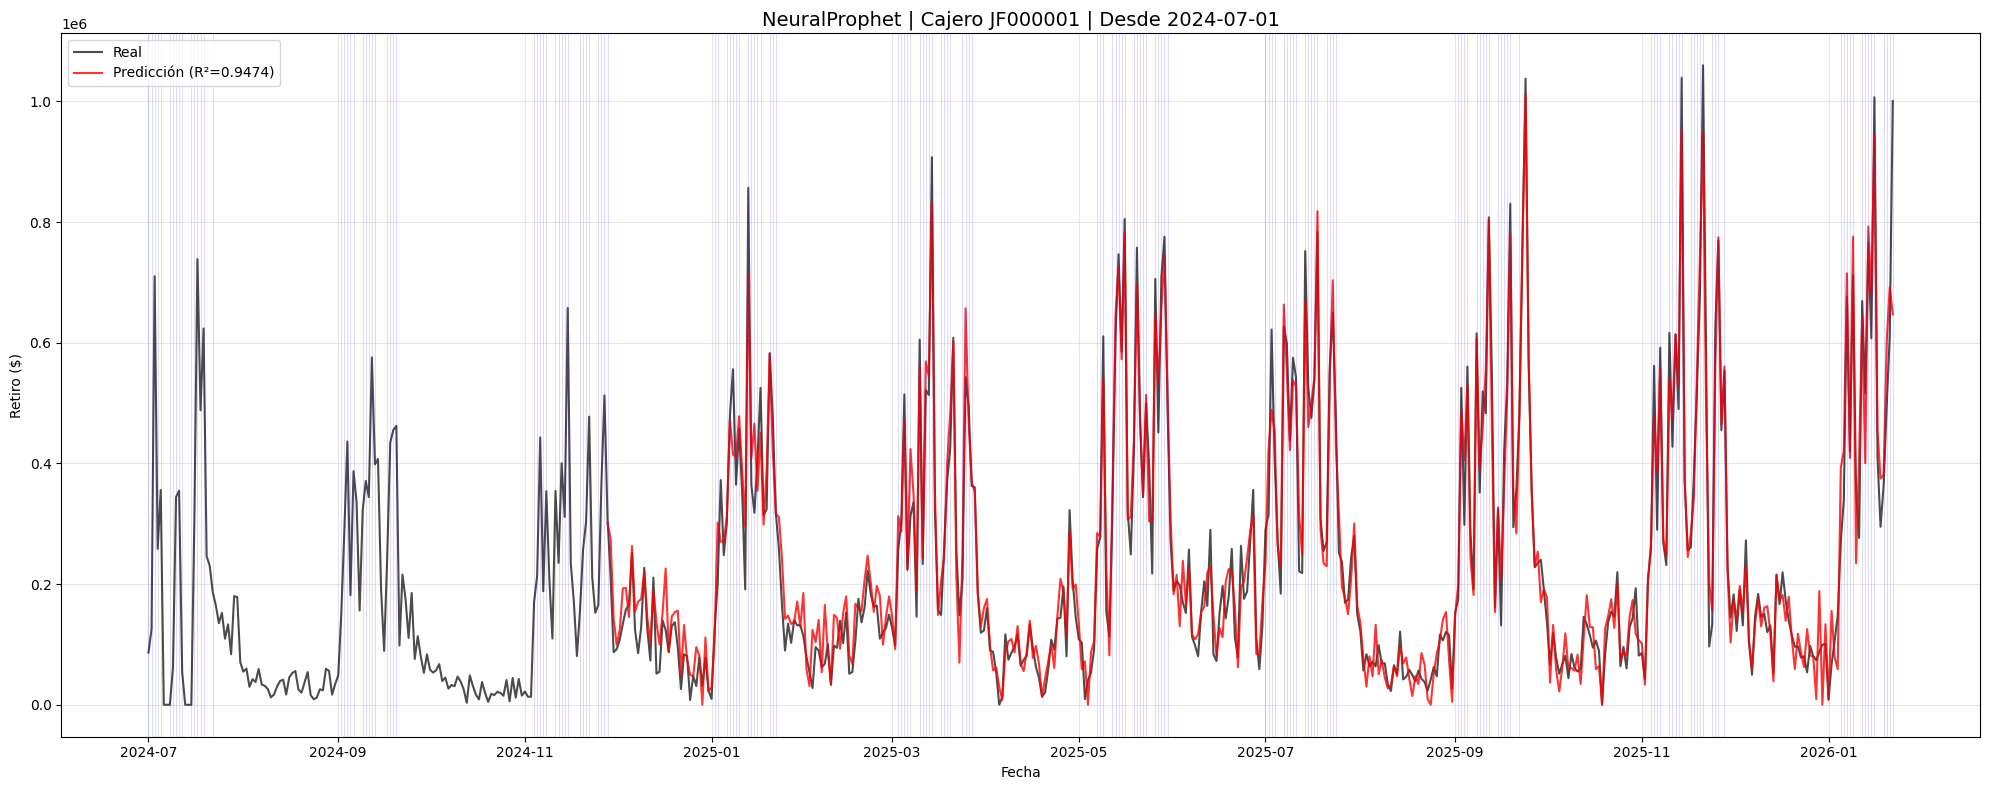


Filas con componentes completos: 421 de 571


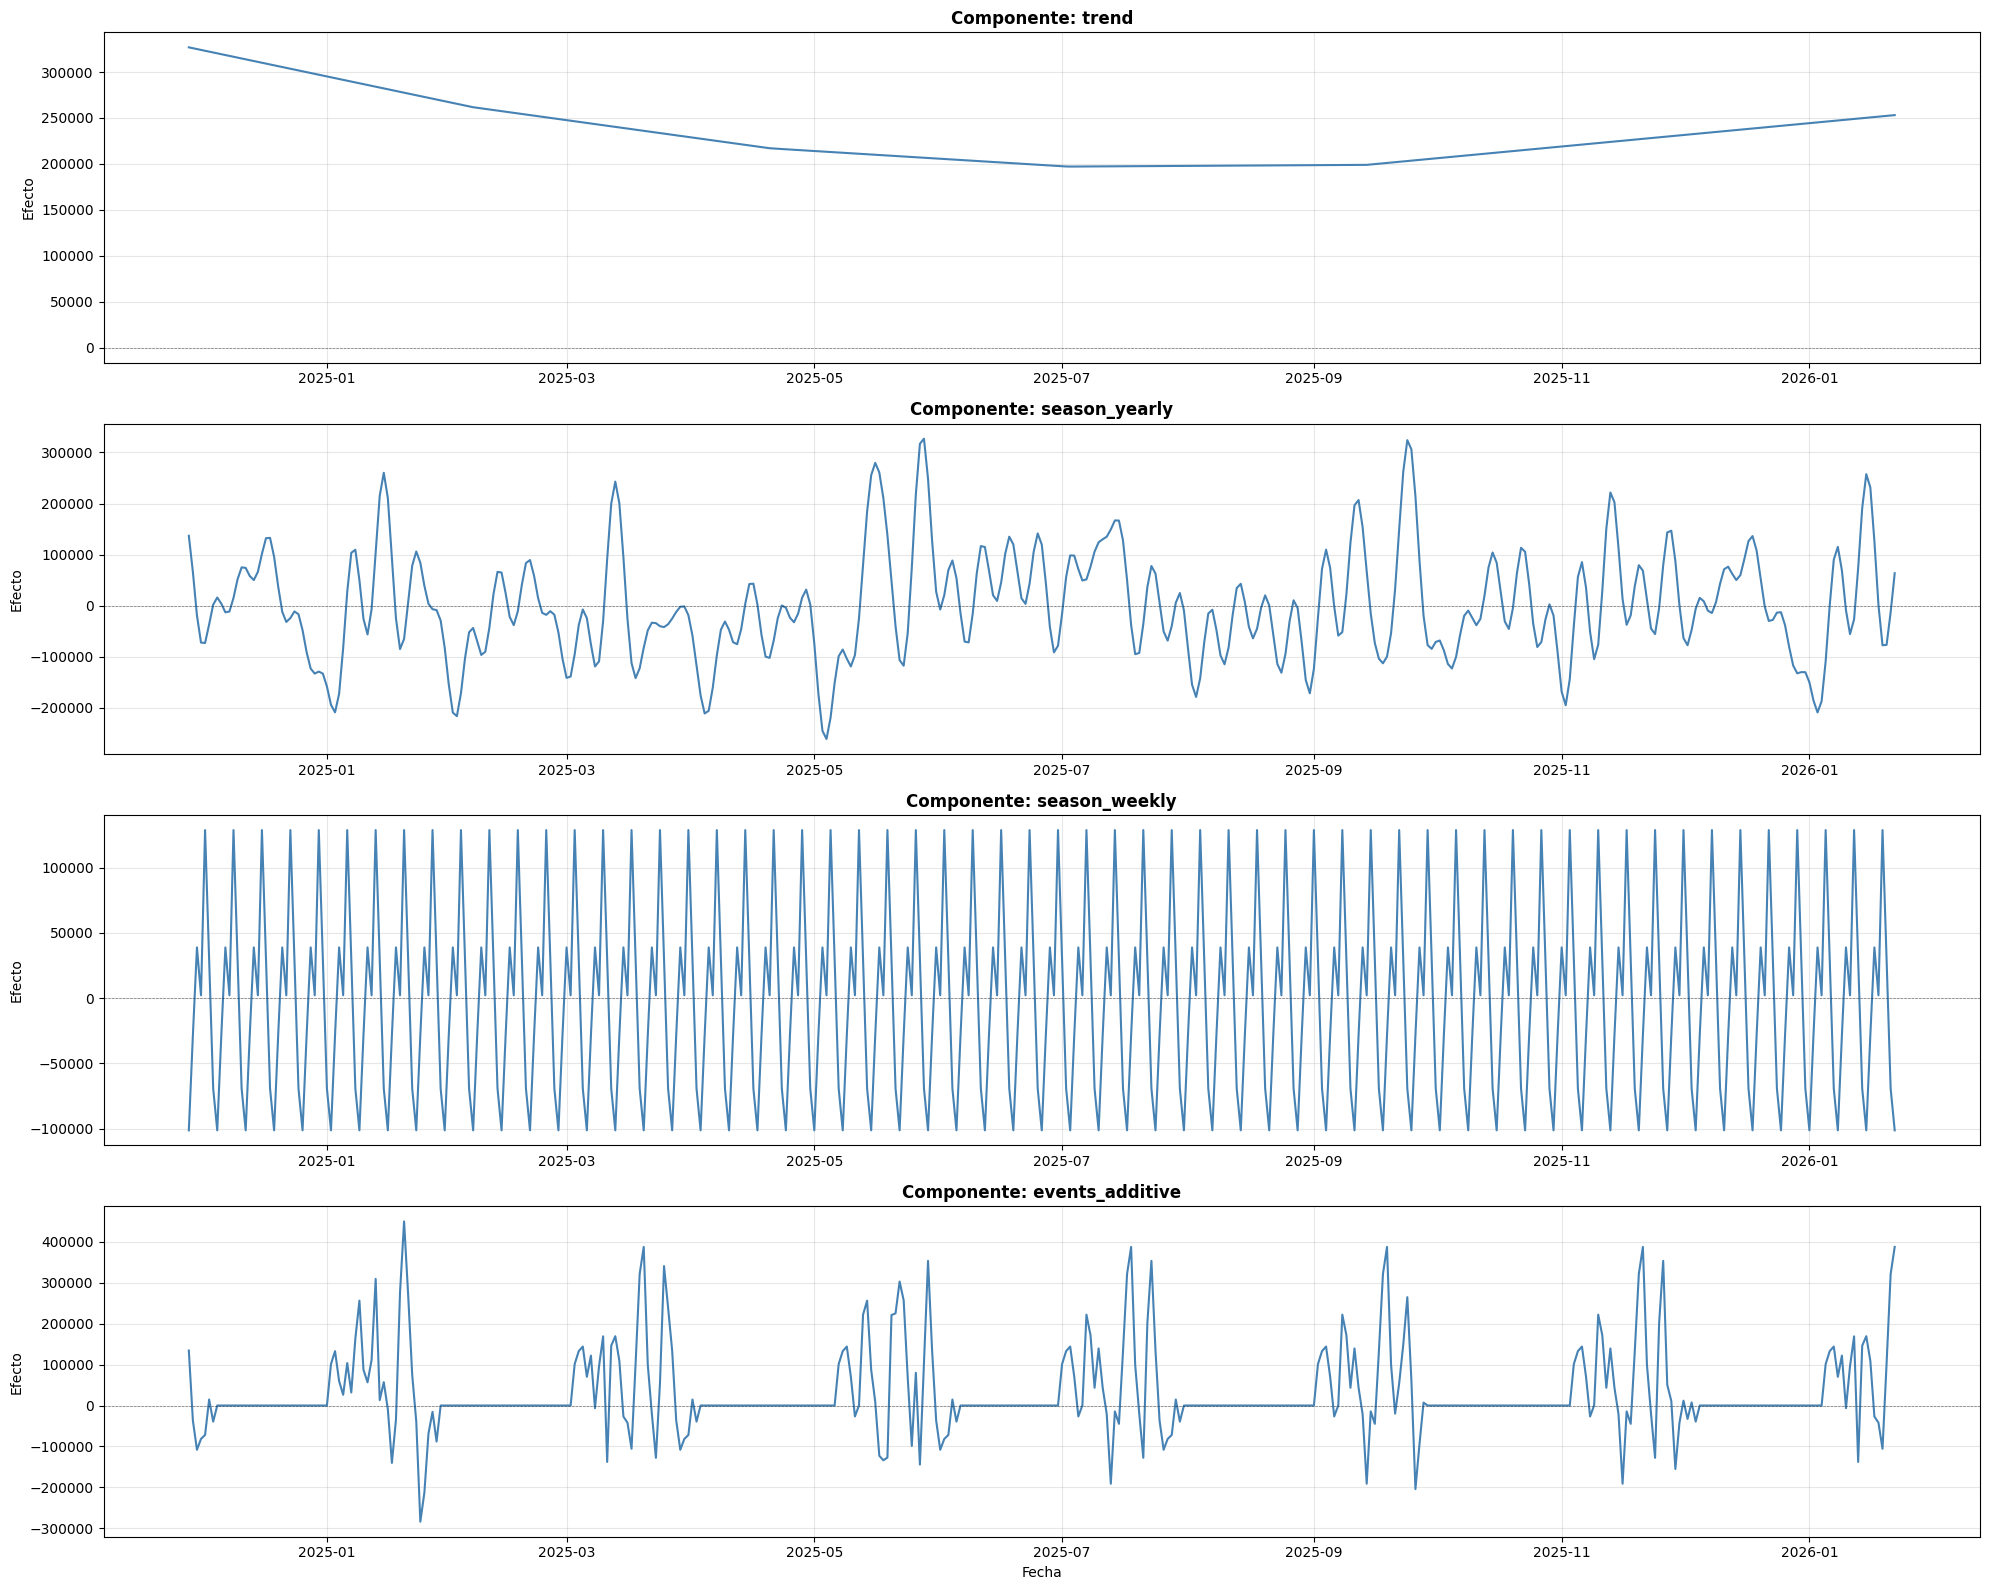

Componentes graficados exitosamente.
RMSE modelo recién entrenado: 49388.43299130583


In [78]:
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# ============================================================
# 1. PREPARAR DATOS
# ============================================================
# Definir periodo de análisis y cajero a modelar
fecha_inicio = '2024-07-01'  # Inicio post-periodo electoral
cajero_test = 'JF000001'

# Filtrar datos del cajero y periodo específico
df_cajero = df[(df['fecha'] >= fecha_inicio) & (df['cajero'] == cajero_test)][['fecha', 'retiro']].copy()
df_cajero.columns = ['ds', 'y']  # NeuralProphet también requiere columnas 'ds' e 'y'
df_cajero = df_cajero.sort_values('ds').reset_index(drop=True)

print(f"Cajero {cajero_test}: {len(df_cajero)} observaciones desde {fecha_inicio}")
print(f"Rango: {df_cajero['ds'].min()} → {df_cajero['ds'].max()}")

# ============================================================
# 2. CONFIGURAR HOLIDAYS (FECHAS DE DISPERSIÓN)
# ============================================================
# Elegir nivel de granularidad de holidays:
# - 'granular': 54 eventos (adultos_mayores_A, adultos_mayores_B, etc.)
# - 'agregado': 3 eventos (adultos_mayores, discapacidad, madres_trabajadoras)
holidays_type = 'granular' # agregado / granular
holidays_usar = holidays_df_granular if holidays_type == 'granular' else holidays_df_agregado

print(f"\nHolidays: {holidays_type}")
print(f"  Eventos únicos: {holidays_usar['holiday'].nunique()}")
print(f"  Total registros: {len(holidays_usar)}")

# NeuralProphet requiere holidays como columnas binarias en el dataframe
df_cajero_eventos = df_cajero.copy()
for holiday_name in holidays_usar['holiday'].unique():
    fechas_holiday = holidays_usar[holidays_usar['holiday'] == holiday_name]['ds'].values
    # Crear columna binaria: 1 si es día de ese holiday, 0 si no
    df_cajero_eventos[holiday_name] = df_cajero_eventos['ds'].isin(fechas_holiday).astype(int)
    # Aplicar ventana de efecto (lower_window=0, upper_window=3)
    for i in range(1, 4):  # 3 días después
        df_cajero_eventos.loc[
            df_cajero_eventos['ds'].isin(fechas_holiday + pd.Timedelta(days=i)), 
            holiday_name
        ] = 1

# ============================================================
# 3. CONFIGURAR MODELO NEURALPROPHET
# ============================================================
print("\n" + "="*80)
print("CONFIGURANDO MODELO NEURALPROPHET - TRADUCCIÓN DE PROPHET ÓPTIMO")
print("="*80)

modelo = NeuralProphet(
    # --- TENDENCIA ---
    growth='linear',  # Tendencia: 'linear'=crecimiento constante, 'discontinuous'=permite saltos/cambios abruptos
    n_changepoints=6,                    # Número de puntos de cambio en la tendencia
    changepoints_range=0.9,               # Rango donde se permiten changepoints
    trend_reg=5,                        # Regularización de tendencia: 0.1=flexible/cambios bruscos, 1.0=moderado, 10=muy suave (inverso a Prophet)
    
    # --- COMPONENTE AUTORREGRESIVO (NUEVO - NO EXISTE EN PROPHET) ---
    n_lags=150,                            # Memoria: usa últimos 60 días de retiros como features
    ar_reg=0.01,                           # Regularización del AR: 0.01=muy flexible/usa historial agresivamente, 0.1=moderado, 1.0=restrictivo
    
    # --- ESTACIONALIDAD ANUAL ---
    yearly_seasonality=52,                # Términos de Fourier para capturar ciclo anual (igual que Prophet)
    seasonality_mode='additive',  # Modo: 'additive'=efectos constantes, 'multiplicative'=efectos escalan con nivel base
    seasonality_reg=3,                 # Regularización de estacionalidad: 0.01=muy flexible, 0.1=moderado, 1.0=rígido (inverso a Prophet's seasonality_prior_scale)
    
    # --- ESTACIONALIDADES SEMANAL Y DIARIA ---
    weekly_seasonality=True,              # Activada: puede haber patrón semanal leve
    daily_seasonality=False,              # Desactivada: no hay patrón intra-día en datos diarios
    
    # --- PREDICCIÓN MULTI-HORIZONTE ---
    n_forecasts=30,                       # Predecir 30 días hacia adelante simultáneamente
    
    # --- ENTRENAMIENTO ---
    epochs=100,                           # Iteraciones de entrenamiento
    batch_size=32,  # Tamaño de batch para gradiente: 16=lento/preciso, 32=balanceado, 64=rápido/menos preciso
    learning_rate=0.01,  # Tasa de aprendizaje: 0.001=lento/estable, 0.01=balanceado, 0.1=rápido/inestable
    
    # --- OTROS ---
    loss_func='Huber',  # Función de pérdida: 'MSE'=sensible a outliers, 'Huber'=robusta a outliers, 'MAE'=muy robusta
    normalize='standardize',  # Normalización: 'off'=sin normalizar, 'minmax'=escala 0-1, 'standardize'=media 0 y std 1
    impute_missing=True  # Rellena gaps: True=interpola valores faltantes, False=mantiene NaN (puede causar errores)
)

print(f"\nParámetros configurados:")
print(f"  trend_reg:           {1.0}")
print(f"  n_lags (AR):         {60} ← NUEVO: memoria de 2 meses")
print(f"  ar_reg:              {0.1} ← NUEVO: permite usar historial")
print(f"  yearly_seasonality:  {52}")
print(f"  seasonality_reg:     {0.03}")
print(f"  seasonality_mode:    multiplicative")
print(f"  n_forecasts:         {30}")
print(f"  epochs:              {100}")
print(f"  Holidays únicos:     {holidays_usar['holiday'].nunique()}")

# ============================================================
# 4. AGREGAR HOLIDAYS (EVENTOS) AL MODELO
# ============================================================
print("\nAgregando holidays como eventos...")
for holiday_name in holidays_usar['holiday'].unique():
    modelo = modelo.add_events(
        holiday_name,
        lower_window=0,                   # Efecto comienza el día del evento
        upper_window=3,                   # Efecto dura 3 días después
        regularization=0.1                # Regularización de eventos
    )
print(f"  Eventos agregados: {len(holidays_usar['holiday'].unique())}")

# ============================================================
# 5. ENTRENAR MODELO (100 EPOCHS Y RESTAURAR MENOR LOSS REAL)
# ============================================================

print("\nIniciando entrenamiento con checkpointing interno...")

metrics = modelo.fit(
    df_cajero_eventos,
    freq='D',
    checkpointing=True  # Activa guardado automático del mejor modelo
)

print("Entrenamiento completado.")

# Mostrar mejor loss encontrado
best_loss = metrics['Loss'].min()
best_epoch = metrics['Loss'].idxmin()

print(f"Mejor loss encontrado: {best_loss:.6f}")
print(f"Ocurrió en epoch: {best_epoch}")

# 
# 5.1 RESTAURAR MEJOR CHECKPOINT REAL
# 

import torch

best_ckpt_path = modelo.trainer.checkpoint_callback.best_model_path
print(f"Restaurando mejor checkpoint desde:\n{best_ckpt_path}")

ckpt = torch.load(best_ckpt_path, map_location='cpu')

# Cargar solo pesos al modelo interno
modelo.model.load_state_dict(ckpt['state_dict'])

print("Modelo restaurado al estado con menor loss.")


# ============================================================
# 6. GENERAR PREDICCIONES
# ============================================================
#forecast = modelo.predict(df_cajero_eventos)

forecast = modelo.predict(df_cajero_eventos)
# NeuralProphet con n_forecasts=30 genera yhat1, yhat2, ..., yhat30
# Usamos yhat1 (predicción a 1 día) para comparar con valores históricos
merged = df_cajero.merge(forecast[['ds', 'yhat1']], on='ds').dropna(subset=['yhat1'])

from sklearn.metrics import mean_squared_error
import numpy as np

rmse_entrenado = np.sqrt(mean_squared_error(
    merged['y'],
    merged['yhat1']
))

print("RMSE modelo recién entrenado:", rmse_entrenado)
# ============================================================
# 7. EVALUAR DESEMPEÑO
# ============================================================
# Convertir predicciones negativas a cero
print("\nAplicando corrección: predicciones negativas → 0")
negativos_antes = (merged['yhat1'] < 0).sum()
merged['yhat1'] = merged['yhat1'].clip(lower=0)
print(f"  Predicciones negativas corregidas: {negativos_antes}")

# Calcular métricas
r2 = r2_score(merged['y'], merged['yhat1'])
mae = mean_absolute_error(merged['y'], merged['yhat1'])
rmse = np.sqrt(((merged['yhat1'] - merged['y'])**2).mean())

print(f"\n{'='*80}")
print("RESULTADOS:")
print(f"  R² (coeficiente de determinación): {r2:.4f}")
print(f"     → % de varianza explicada por el modelo")
print(f"  MAE (error absoluto medio):        ${mae:,.0f}")
print(f"     → Error promedio en pesos")
print(f"  RMSE (raíz del error cuadrático): ${rmse:,.0f}")
print(f"     → Penaliza más los errores grandes")
print("="*80)

# ============================================================
# 8. GRAFICAR AJUSTE
# ============================================================
fig, ax = plt.subplots(figsize=(20, 8))

# Serie real (negro)
ax.plot(df_cajero['ds'], df_cajero['y'], 
        label='Real', color='black', linewidth=1.5, alpha=0.7)

# Predicción (rojo)
ax.plot(merged['ds'], merged['yhat1'], 
        label=f'Predicción (R²={r2:.4f})', color='red', linewidth=1.5, alpha=0.8)

# Marcar fechas de dispersión (líneas verticales azules)
for fecha in holidays_usar['ds'].unique():
    if fecha >= df_cajero['ds'].min() and fecha <= df_cajero['ds'].max():
        ax.axvline(fecha, color='blue', alpha=0.2, linewidth=0.5)

ax.set_title(f'NeuralProphet | Cajero {cajero_test} | Desde {fecha_inicio}', 
             fontsize=14)
ax.set_xlabel('Fecha')
ax.set_ylabel('Retiro ($)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# 9. GRAFICAR COMPONENTES MANUALMENTE
# ============================================================

# Filtrar filas sin NaN en componentes
if holidays_type == 'granular':
    # Para granular: solo graficar componentes agregados (trend, season, events_additive)
    componentes_a_graficar = ['trend', 'season_yearly', 'season_weekly', 'events_additive']
else:
    # Para agregado: incluir eventos individuales
    componentes_a_graficar = ['trend', 'season_yearly', 'season_weekly', 'events_additive', 
                              'event_adultos_mayores', 'event_discapacidad', 'event_madres_trabajadoras']

forecast_limpio = forecast.dropna(subset=componentes_a_graficar)

print(f"\nFilas con componentes completos: {len(forecast_limpio)} de {len(forecast)}")

if len(forecast_limpio) > 0:
    fig, axes = plt.subplots(len(componentes_a_graficar), 1, figsize=(20, 4*len(componentes_a_graficar)))
    
    for idx, componente in enumerate(componentes_a_graficar):
        axes[idx].plot(forecast_limpio['ds'], forecast_limpio[componente], 
                      linewidth=1.5, color='steelblue')
        axes[idx].set_title(f'Componente: {componente}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel('Efecto')
        axes[idx].grid(True, alpha=0.3)
        axes[idx].axhline(0, color='black', linestyle='--', linewidth=0.5, alpha=0.5)
    
    axes[-1].set_xlabel('Fecha')
    plt.tight_layout()
    plt.show()
    print("Componentes graficados exitosamente.")
else:
    print("No hay suficientes datos sin NaN para graficar componentes.")
    print("Esto puede pasar si n_lags es muy grande vs el tamaño del dataset.")

print("RMSE modelo recién entrenado:", rmse_entrenado)


In [86]:
# Guardar modelo como .np. Parece no funcionar pero en la ejecución sí funciona.
from neuralprophet import save
save(modelo, "../Scripts/geralt_project_root/models/neuralprophet.np")
modelo.save("neuralprophet.np")

AttributeError: 'NeuralProphet' object has no attribute 'save'

In [87]:
print("RMSE modelo recién entrenado:", rmse_entrenado) #del modelo entrenado

RMSE modelo recién entrenado: 49388.43299130583


In [65]:
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error
import numpy as np
from neuralprophet import load

# Cargar modelo guardado
modelo_cargado = load(
    r"C:\Users\Temporal\Desktop\Prophet_banco_bienestar\Scripts\geralt_project_root\models\neuralprophet.np"
)

# Generar predicciones
forecast_loaded = modelo_cargado.predict(df_cajero_eventos)

merged_loaded = df_cajero.merge(
    forecast_loaded[['ds','yhat1']],
    on='ds'
).dropna()

rmse_cargado = np.sqrt(mean_squared_error(
    merged_loaded['y'],
    merged_loaded['yhat1']
))

print("RMSE modelo cargado:", rmse_cargado)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.825% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.834% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - c:\Users\Temporal\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\time_dataset.py:611: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  additive_events[key] = offset_feature

WARNING - (py.warnings._showwarnmsg) - c:\Users\Temporal\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\time_dataset.py:611: PerformanceWar

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



RMSE modelo cargado: 47540.04257154695


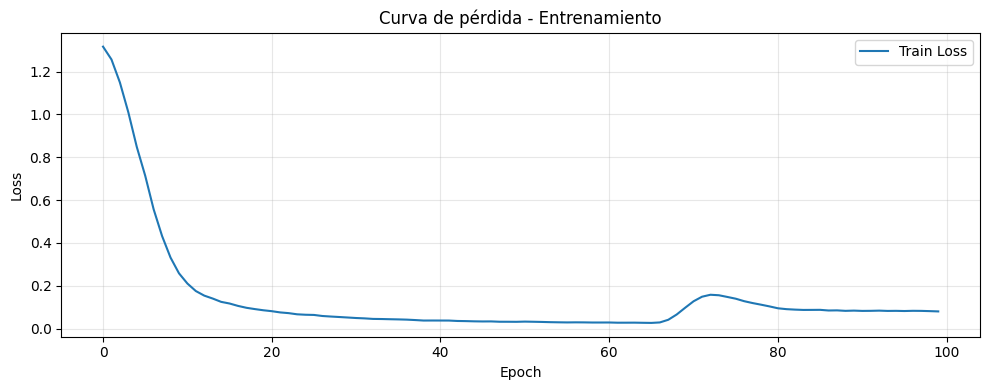

In [88]:
# Curva de pérdida
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(metrics['Loss'], label='Train Loss')
if 'Loss_val' in metrics.columns:
    ax.plot(metrics['Loss_val'], label='Val Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Curva de pérdida - Entrenamiento')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [89]:
import os
from neuralprophet import load
modelo_cargado2 = load("../Scripts/geralt_project_root/models/neuralprophet.np")

In [ ]:
import pandas as pd
from neuralprophet import load

# 1. Cargar el modelo guardado
modelo = load("../Scripts/geralt_project_root/models/neuralprophet.np")

# 2. Preparar datos para predicción
# Asegúrate de que 'df_cajero_eventos' esté disponible o carga tus datos históricos
# Si no tienes el DataFrame original, ajusta esta parte según tu caso
# Ejemplo: df_cajero_eventos = pd.read_csv("tus_datos.csv")

# 3. Crear un DataFrame con fechas futuras para predecir
# Asegúrate de que la columna de fecha se llame 'ds' y la de valor 'y'
futuro = modelo.make_future_dataframe(df_cajero_eventos, periods=365)  # Predice 365 días hacia adelante

# 4. Hacer predicciones
predicciones = modelo.predict(futuro)

# 5. Guardar o visualizar resultados
print(predicciones.head())

# Opcional: Guardar predicciones a CSV
predicciones.to_csv("../Scripts/geralt_project_root/predictions/neuralprophet_predictions.csv", index=False)

# Opcional: Graficar resultados
fig = modelo.plot(predicciones)
fig.savefig("../Scripts/geralt_project_root/predictions/neuralprophet_plot.png")


In [90]:
# Generar predicciones sorbe todo el data set df_cajeros_eventos
forecast_loaded = modelo_cargado2.predict(df_cajero_eventos) 

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.825% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.834% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - c:\Users\Temporal\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\time_dataset.py:611: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  additive_events[key] = offset_feature

WARNING - (py.warnings._showwarnmsg) - c:\Users\Temporal\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\time_dataset.py:611: PerformanceWar

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


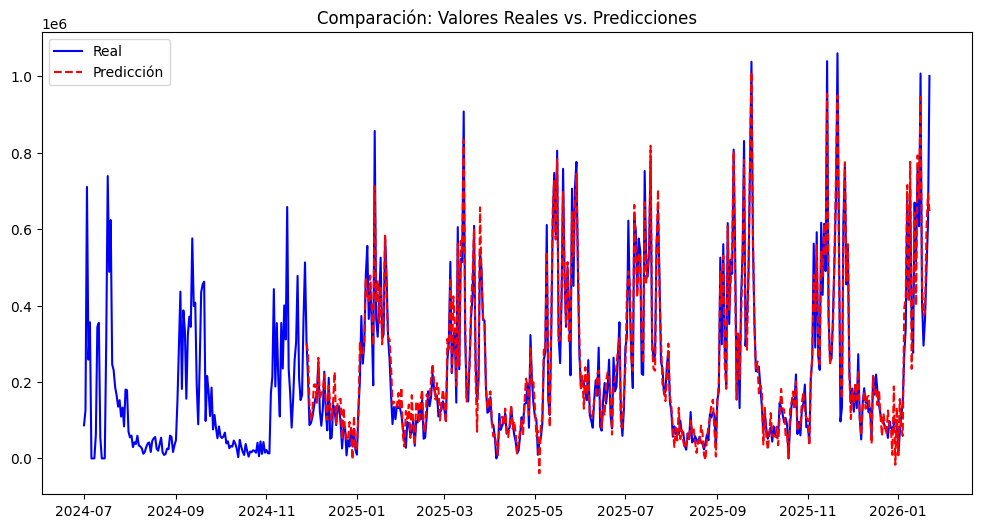

In [93]:
# predicciones vs reales
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_cajero_eventos['ds'], y_real, label='Real', color='blue')
plt.plot(df_cajero_eventos['ds'], y_pred, label='Predicción', color='red', linestyle='--')
plt.legend()
plt.title("Comparación: Valores Reales vs. Predicciones")
plt.show()


In [95]:
print("Número de NaN en y_real:", np.isnan(y_real).sum())
print("Número de NaN en y_pred:", np.isnan(y_pred).sum())
print("Total de datos en y_real:", len(y_real))
print("Total de datos en y_pred:", len(y_pred))


Número de NaN en y_real: 0
Número de NaN en y_pred: 150
Total de datos en y_real: 571
Total de datos en y_pred: 571


In [96]:
# Crear máscara para valores NO NaN en ambos arrays
mask = ~np.isnan(y_real) & ~np.isnan(y_pred)

# Aplicar la máscara
y_real_clean = y_real[mask]
y_pred_clean = y_pred[mask]

# Ahora calcula R² con los datos limpios
r2 = r2_score(y_real_clean, y_pred_clean)
print(f"R² (limpio): {r2:.4f}")


R² (limpio): 0.9469


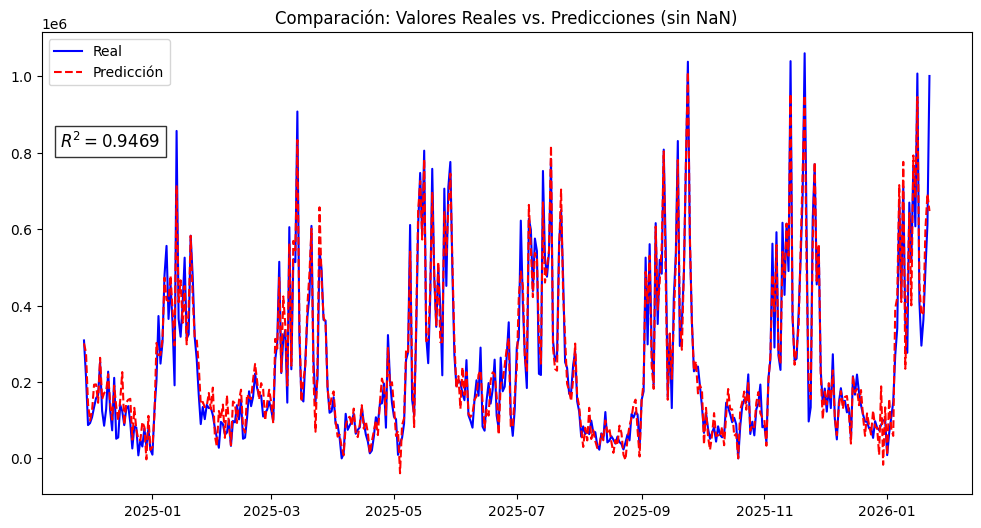

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_cajero_eventos['ds'].iloc[mask], y_real_clean, label='Real', color='blue')
plt.plot(df_cajero_eventos['ds'].iloc[mask], y_pred_clean, label='Predicción', color='red', linestyle='--')

# Añadir R² al gráfico
plt.text(0.02, 0.75, f'$R^2 = {r2:.4f}$', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.legend()
plt.title("Comparación: Valores Reales vs. Predicciones (sin NaN)")
plt.show()
